In [1]:
!pip install pandas

In [3]:
!pip install xlrd

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from seaborn import lmplot

In [2]:
nombre='DATA-PRUEBA_CALIFICACIONES  2017-20120-UNMSM.xlsx'
df=pd.concat(pd.read_excel(nombre, sheet_name = None), ignore_index = True )
df.drop(["Unnamed: 9","Unnamed: 10"], axis=1, inplace=True)

In [8]:
df

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final,Facultad,Calificación
0,20171,1,1,2004,MH0440,14010029,16.0,Medicina Humana,Bueno
1,20171,1,1,2004,MH0440,14010276,16.0,Medicina Humana,Bueno
2,20171,1,1,2004,MH0440,13010237,15.0,Medicina Humana,Bueno
3,20171,1,1,2004,MH0440,13010241,15.0,Medicina Humana,Bueno
4,20171,1,1,2004,MH0440,12010327,13.0,Medicina Humana,Aprobado
...,...,...,...,...,...,...,...,...,...
1151753,20202,20,2,2018,202W0607,18200281,15.0,Ingenieria Sistemas e informatica,Bueno
1151754,20202,20,2,2018,202W0607,18200315,14.0,Ingenieria Sistemas e informatica,Bueno
1151755,20202,20,2,2018,202W0607,18200323,16.0,Ingenieria Sistemas e informatica,Bueno
1151756,20202,20,2,2018,202W0607,18200320,13.0,Ingenieria Sistemas e informatica,Aprobado


In [ ]:
condicion=[
    (df['val_calific_final']<=10),
    (df['val_calific_final']>10) & (df['val_calific_final']<=13),
    (df['val_calific_final']>13) & (df['val_calific_final']<=16),
    (df['val_calific_final']>16) & (df['val_calific_final']<=18),
    (df['val_calific_final']>18)
    ]
values=['Desaprobado','Aprobado','Bueno','Muy bueno','Sobresaliente']
df['Clasificacion']=np.select(condicion, values)
df


In [ ]:
#Cantidad de alumnos por semestre

In [ ]:
condicion2=[
    (df['cod_facultad']==1),
    (df['cod_facultad']==2),
    (df['cod_facultad']==3),
    (df['cod_facultad']==4),
    (df['cod_facultad']==5),
    (df['cod_facultad']==6),
    (df['cod_facultad']==7),
    (df['cod_facultad']==8),
    (df['cod_facultad']==9),
    (df['cod_facultad']==10),
    (df['cod_facultad']==11),
    (df['cod_facultad']==12),
    (df['cod_facultad']==13),
    (df['cod_facultad']==14),
    (df['cod_facultad']==15),
    (df['cod_facultad']==16),
    (df['cod_facultad']==17),
    (df['cod_facultad']==18),
    (df['cod_facultad']==19),
    (df['cod_facultad']==20)    
    ]
values=['Facultad de Medicina','Facultad de Farmacia y Bioquimica','Facultad de Odontología',
       'Facultad de Medicina Veterinaria','Facultad de Psicología','Facultad de Ciencias Biológicas','Facultad de Ciencias Físicas',
       'Facultad de Ciencias Matemáticas','Facultad de Ingeniería Geológica, Minera, Metalúrgica y Geográfica','Facultad de Ingeniería Industrial','Facultad de Ingeniería Industrial',
       'Facultad de Ingeniería de Sistemas e Informática','Facultad de Química e Ingeniería Química','Facultad de Ciencias Administrativas',
       'Facultad de Ciencias Contables', 'Facultad de Ciencias Económicas','Facultad de Letras y Ciencias Humanas','Facultad de Educación','Facultad de Derecho y Ciencia Política',
       'Facultad de Ciencias Sociales']
df['cod_facultad']=np.select(condicion2, values)
df

In [4]:
calificaciones=df.groupby(['Facultad','Calificación'])['Calificación'].count().reset_index(name='Cantidad')
calificaciones

,Facultad,Calificación,Cantidad
0,Ciencias Administrativas,Aprobado,14315
1,Ciencias Administrativas,Bueno,43240
2,Ciencias Administrativas,Desaprobado,4729
3,Ciencias Administrativas,Muy Bueno,31142
4,Ciencias Administrativas,Sobresaliente,7435
...,...,...,...
95,Quimica,Aprobado,14833
96,Quimica,Bueno,10034
97,Quimica,Desaprobado,5203
98,Quimica,Muy Bueno,3461


Text(0, 0.5, 'Cantidad')

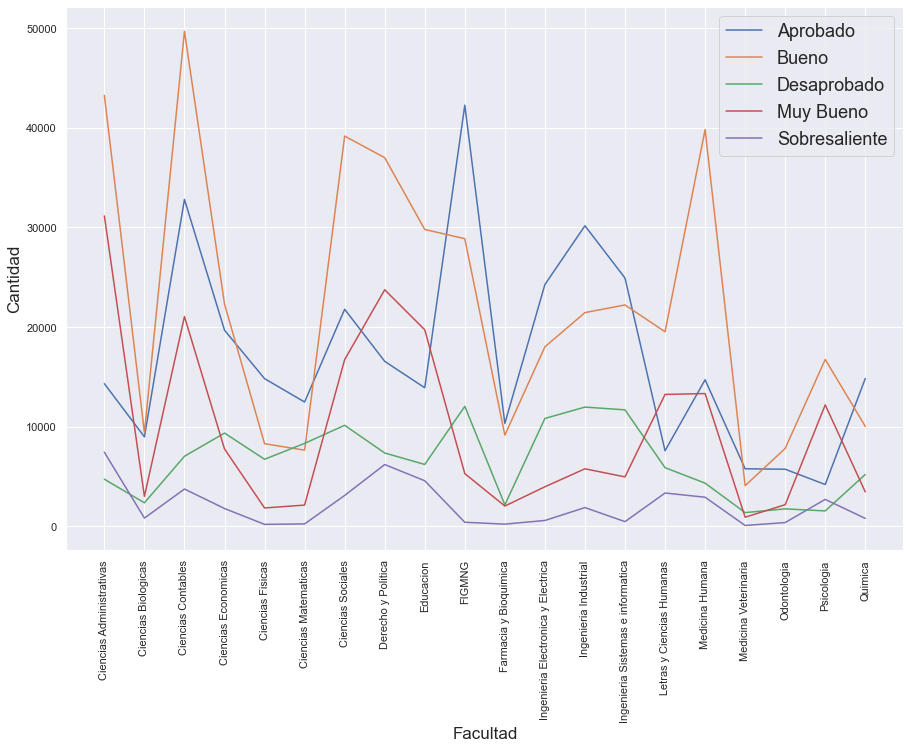

In [45]:
sb.set(rc={'figure.figsize':(15,10)})
grafica =sb.lineplot(x='Facultad',y='Cantidad',data=calificaciones,hue='Calificación')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend(fontsize=18)
plt.xlabel('Facultad', fontsize=17)
plt.ylabel('Cantidad', fontsize=17)

Text(0, 0.5, 'Cantidad')

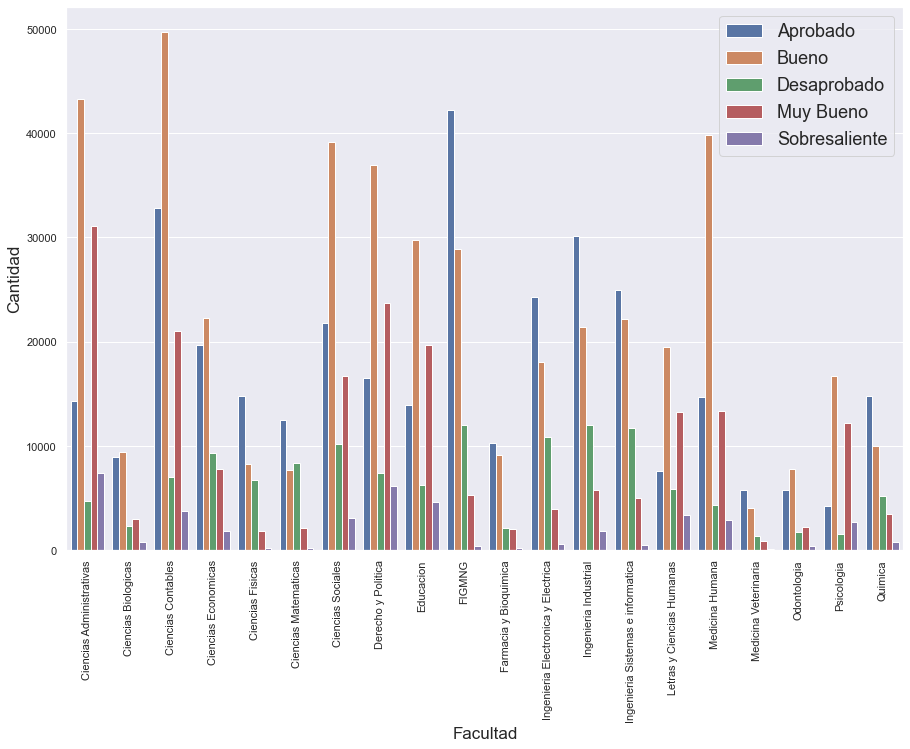

In [47]:
sb.set(rc={'figure.figsize':(15,10)})
grafica1 =sb.barplot(x='Facultad',y='Cantidad',data=calificaciones,hue='Calificación')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend(fontsize=18)
plt.xlabel('Facultad', fontsize=17)
plt.ylabel('Cantidad', fontsize=17)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

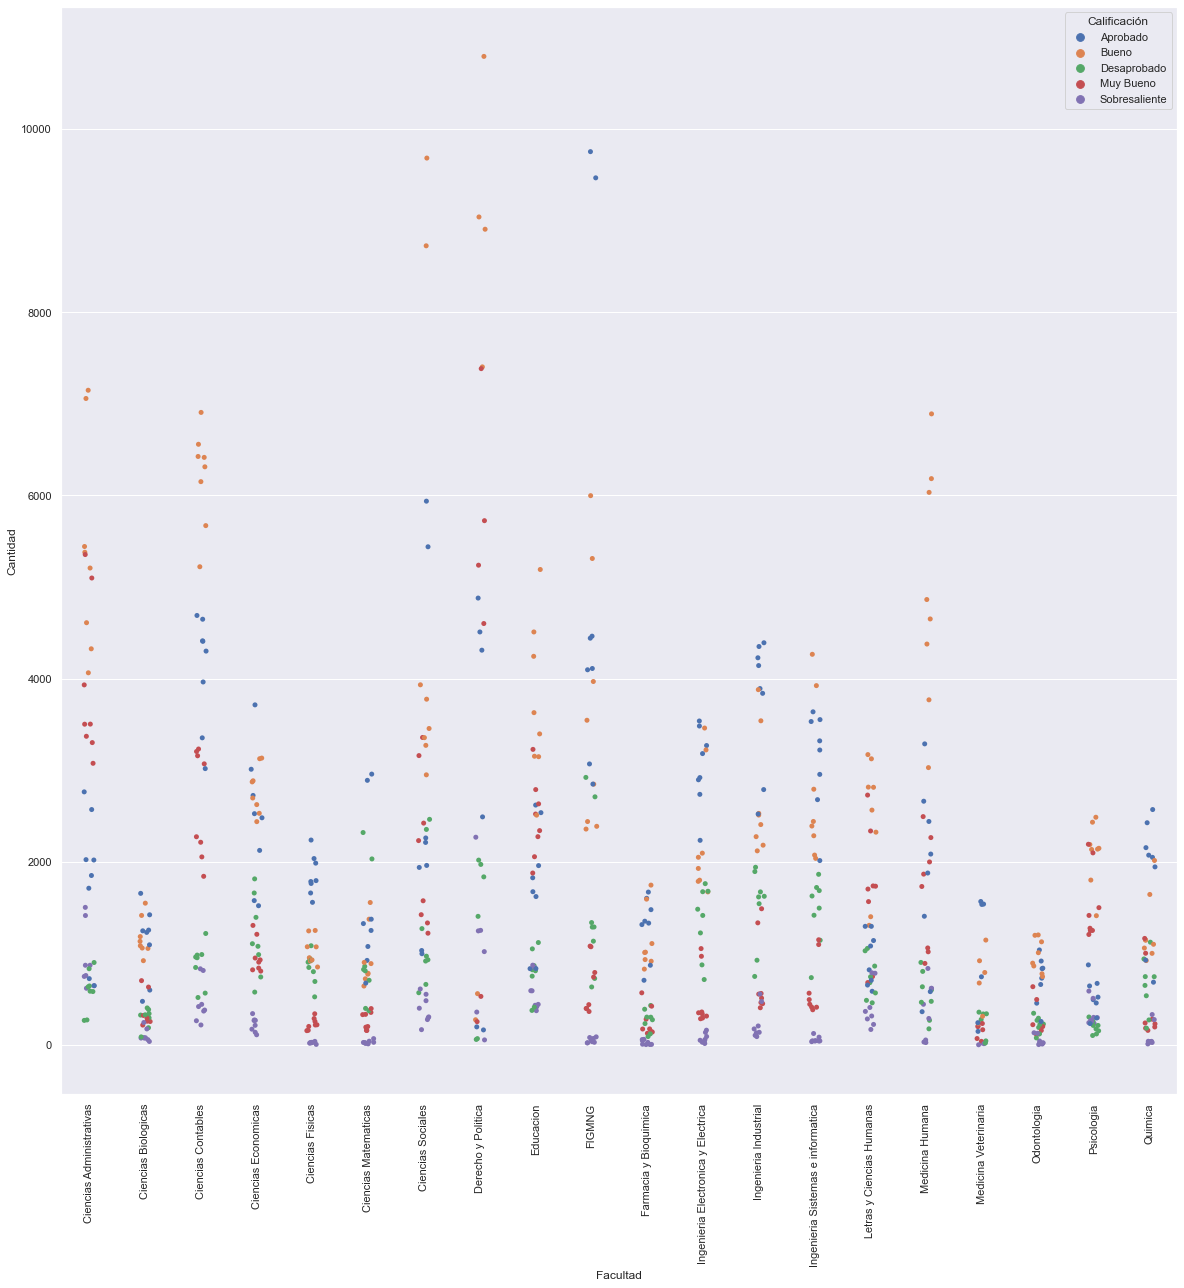

In [52]:
sb.set(rc={'figure.figsize':(20,20)})
grafica2 =sb.stripplot(x='Facultad',y='Cantidad',data=calificaciones,hue='Calificación')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

Text(0, 0.5, 'Cantidad')

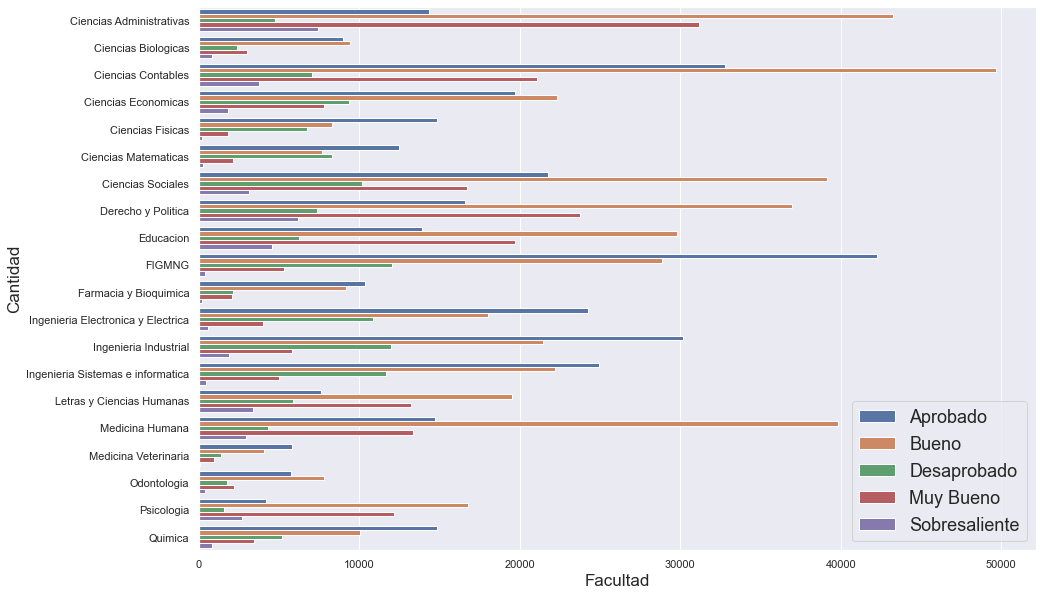

In [49]:
sb.set(rc={'figure.figsize':(15,10)})
grafica3=sb.barplot(x='Cantidad',y='Facultad',data=calificaciones,hue='Calificación',orient='h')
plt.legend(fontsize=18)
plt.xlabel('Facultad', fontsize=17)
plt.ylabel('Cantidad', fontsize=17)

In [67]:
semestres=df.groupby(['Facultad'])['Facultad'].count().reset_index(name='CantidadAlum')
semestres


,Facultad,CantidadAlum
0,Ciencias Administrativas,100861
1,Ciencias Biologicas,24590
2,Ciencias Contables,114293
3,Ciencias Economicas,60909
4,Ciencias Fisicas,31897
5,Ciencias Matematicas,30833
6,Ciencias Sociales,90900
7,Derecho y Politica,90841
8,Educacion,74200
9,FIGMNG,88858


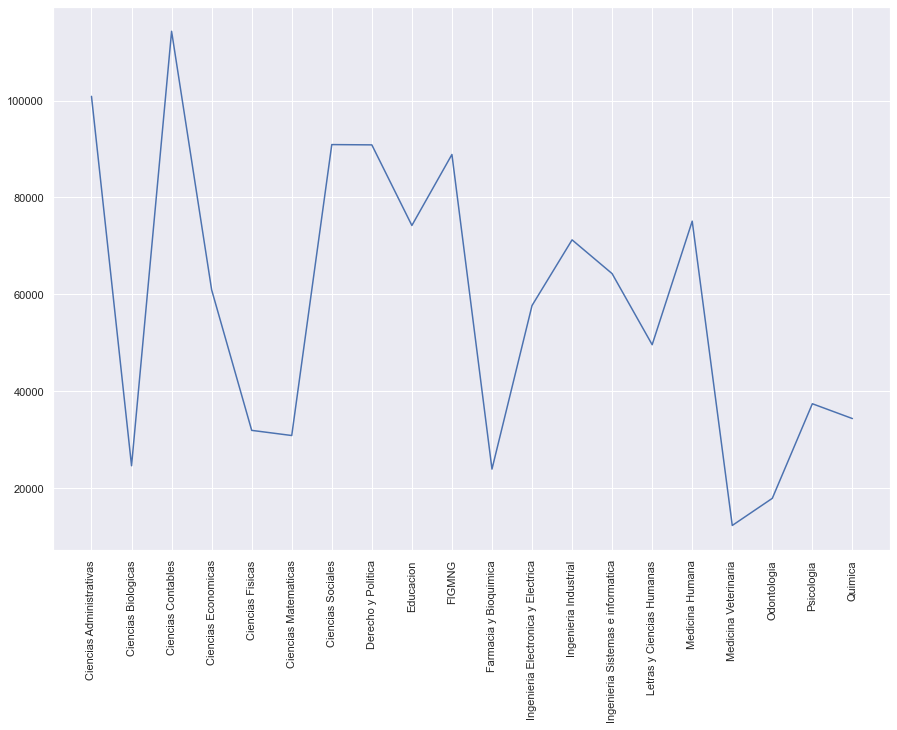

In [68]:

grafica4=plt.plot(semestres['Facultad'],semestres['CantidadAlum'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


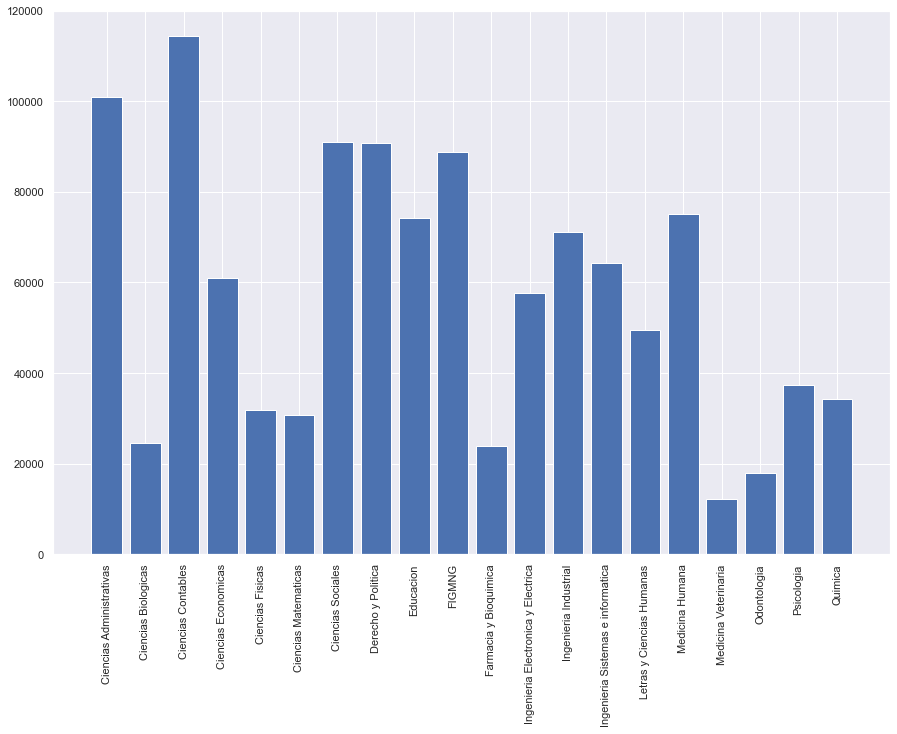

In [69]:
grafica5=plt.bar(semestres['Facultad'],semestres['CantidadAlum'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


In [61]:
datos=df.groupby(['Facultad'])['val_calific_final'].mean().reset_index(name='Promedio')
datos

,Facultad,Promedio
0,Ciencias Administrativas,15.236335
1,Ciencias Biologicas,13.495018
2,Ciencias Contables,14.252579
3,Ciencias Economicas,12.992349
4,Ciencias Fisicas,11.615319
5,Ciencias Matematicas,11.118477
6,Ciencias Sociales,13.688500
7,Derecho y Politica,14.551266
8,Educacion,14.417548
9,FIGMNG,12.509757


Text(0, 0.5, 'Cantidad')

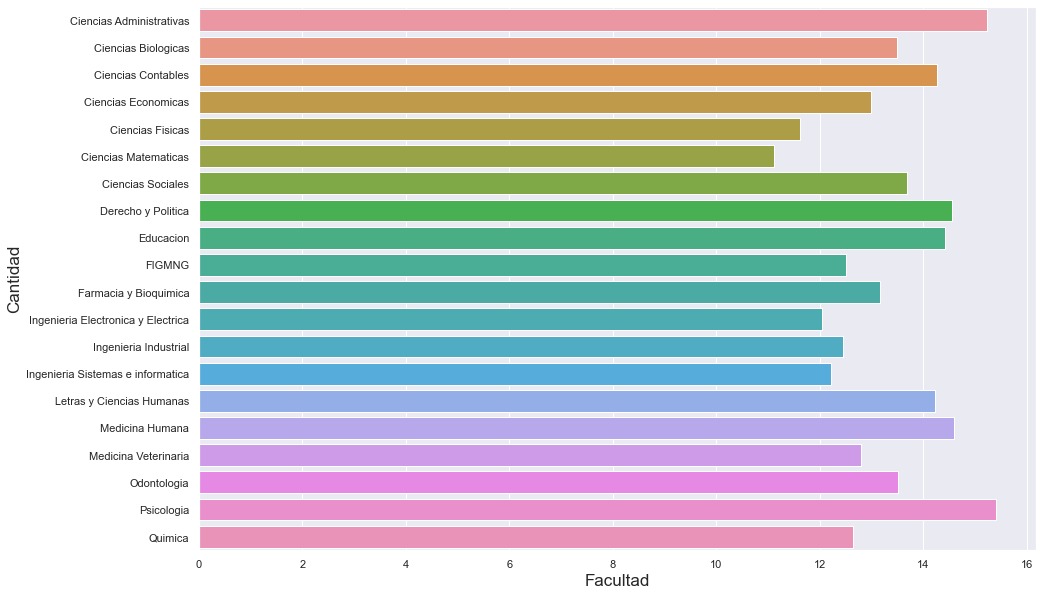

In [62]:
sb.set(rc={'figure.figsize':(15,10)})
grafica3=sb.barplot(x='Promedio',y='Facultad',data=datos,orient='h')
plt.xlabel('Facultad', fontsize=17)
plt.ylabel('Cantidad', fontsize=17)

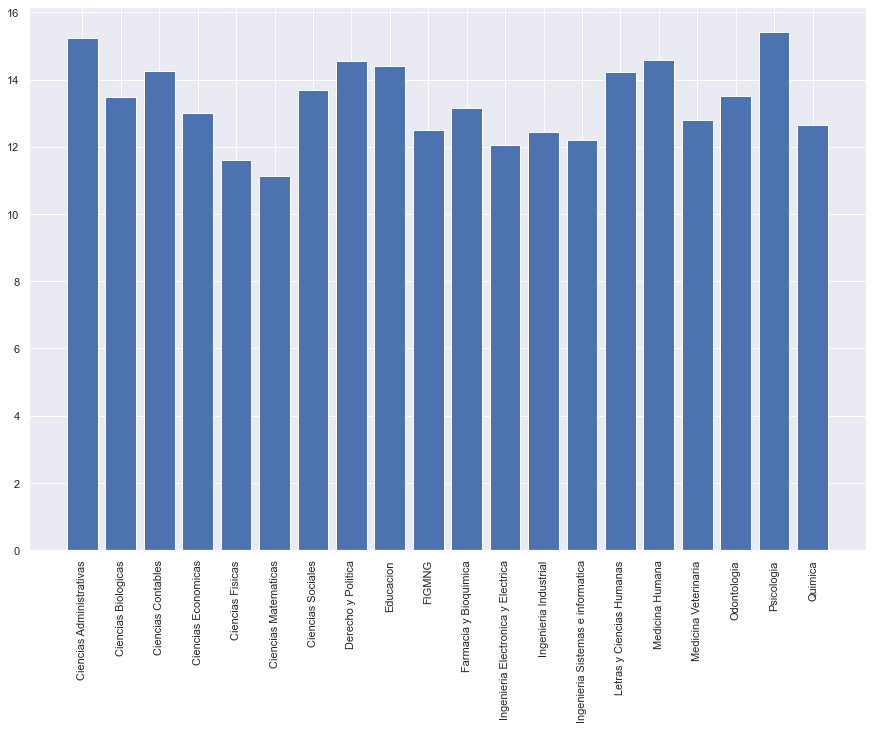

In [63]:
sb.set(rc={'figure.figsize':(15,10)})
grafica6=plt.bar(datos['Facultad'],datos['Promedio'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [64]:
#REGRESION


In [6]:
#ALUMNOS DESAPROBADOS
desaprobados=df['val_calific_final']<=10
df2=df[desaprobados]
df2

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final,Facultad,Calificación
16,20171,1,1,2004,MH0440,09010228,10.0,Medicina Humana,Desaprobado
33,20171,1,1,2004,MH0440,12010009,10.0,Medicina Humana,Desaprobado
58,20171,1,1,2004,MH0440,14010232,10.0,Medicina Humana,Desaprobado
93,20171,1,1,2004,MH0440,13010010,0.0,Medicina Humana,Desaprobado
246,20171,1,1,2004,MH0441,12010009,0.0,Medicina Humana,Desaprobado
...,...,...,...,...,...,...,...,...,...
1151256,20202,20,2,2018,202W0505,18200324,6.0,Ingenieria Sistemas e informatica,Desaprobado
1151275,20202,20,2,2018,202W0507,18200099,8.0,Ingenieria Sistemas e informatica,Desaprobado
1151443,20202,20,2,2018,202W0603,18200325,9.0,Ingenieria Sistemas e informatica,Desaprobado
1151446,20202,20,2,2018,202W0603,18200272,1.0,Ingenieria Sistemas e informatica,Desaprobado


In [8]:
desaprobados_semestres=df2.groupby(['cod_semestre'])['cod_alumno'].nunique().reset_index(name="Cantidad Desaprobados")
desaprobados_semestres

,cod_semestre,Cantidad Desaprobados
0,20171,10977
1,20172,9557
2,20181,9483
3,20182,7919
4,20191,9318
5,20192,7678
6,20201,5480
7,20202,4700


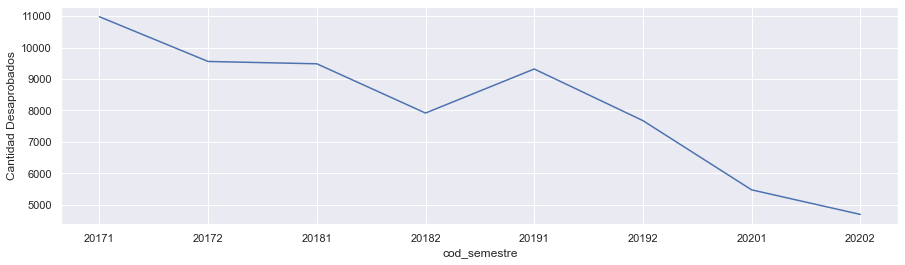

In [10]:
fig, ax=plt.subplots(figsize=(15,4))
desaprobados_semestres['cod_semestre'] =  desaprobados_semestres['cod_semestre'].astype(str)
grafica_desaprobados=sb.lineplot(ax=ax,x='cod_semestre',y='Cantidad Desaprobados',ci=None, data=desaprobados_semestres)

In [13]:
#Implementacion del algoritmo de Regresion Lineal

In [16]:
from sklearn import linear_model
from sklearn.metrics import r2_score

desaprobados_semestres['cod_semestre'] =  desaprobados_semestres['cod_semestre'].astype(int)
regres=linear_model.LinearRegression()

x=desaprobados_semestres['cod_semestre']
y=desaprobados_semestres['Cantidad Desaprobados']

In [18]:
X=x[:,np.newaxis]
print(X)

[[20171]
 [20172]
 [20181]
 [20182]
 [20191]
 [20192]
 [20201]
 [20202]]


<ipython-input-18-83737fa80fe5>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=x[:,np.newaxis]


In [20]:
regres=linear_model.LinearRegression()
regres.fit(X,y)
print(regres.fit(X,y))
print(regres.coef_)

LinearRegression()
[-159.72255489]


In [21]:
m=regres.coef_[0]
b=regres.intercept_
y_p=m*X+b
print('y={0}*x+{1}'.format(m,b))
print("El valor de R^2: ",r2_score(y,y_p))

y=-159.72255489021956*x+3232378.354291417
El valor de R^2:  0.788491496160252


Text(0, 0.5, 'Alumnos_Desaprobados')

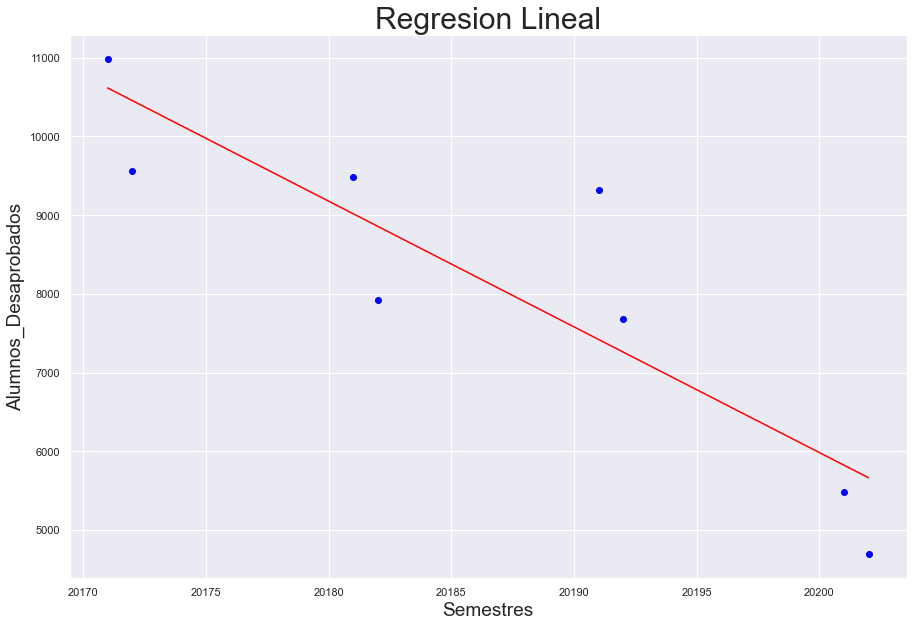

In [70]:
sb.set(rc={'figure.figsize':(15,10)})
plt.scatter(x,y,color='blue')
plt.plot(x,y_p,color='red')
plt.title('Regresion Lineal', fontsize=30)
plt.xlabel('Semestres', fontsize=19)
plt.ylabel('Alumnos_Desaprobados', fontsize=19)

In [26]:
X_new=[[20211],[20212]]
prediccion=regres.predict(X_new)
print(prediccion)

[4225.79740519 4066.0748503 ]


In [27]:
new_row1 = {'cod_semestre':X_new[0][0], 'Cantidad Desaprobados':prediccion[0]}
new_row2 = {'cod_semestre':X_new[1][0], 'Cantidad Desaprobados':prediccion[1]}

desaprobados_semestres_prediccion = desaprobados_semestres.append(new_row1, ignore_index=True)
desaprobados_semestres_prediccion = desaprobados_semestres_prediccion.append(new_row2, ignore_index=True)
desaprobados_semestres_prediccion['cod_semestre'] = desaprobados_semestres_prediccion['cod_semestre'].astype(int)
desaprobados_semestres_prediccion['Cantidad Desaprobados'] = desaprobados_semestres_prediccion['Cantidad Desaprobados'].astype(int)
print(desaprobados_semestres_prediccion)

   cod_semestre  Cantidad Desaprobados
0         20171                  10977
1         20172                   9557
2         20181                   9483
3         20182                   7919
4         20191                   9318
5         20192                   7678
6         20201                   5480
7         20202                   4700
8         20211                   4225
9         20212                   4066


In [29]:
#Corroborando

In [30]:
y_pred = m*np.array([[20211],[20212]])+b
print(y_pred)

[[4225.79740519]
 [4066.0748503 ]]


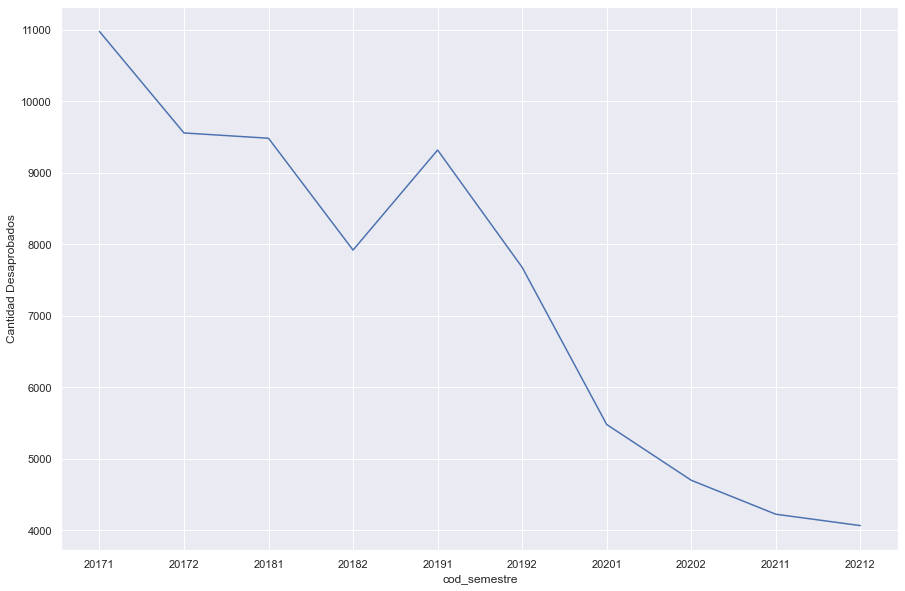

In [71]:
fig, ax = plt.subplots(figsize = (15, 10))
desaprobados_semestres_prediccion['cod_semestre'] = desaprobados_semestres_prediccion['cod_semestre'].astype(str)
grafica_prediccion = sb.lineplot(ax=ax, x='cod_semestre', y='Cantidad Desaprobados',ci=None, data=desaprobados_semestres_prediccion)

In [74]:
datos2=df
condicion=[
    (datos2['val_calific_final']<=10),
    (datos2['val_calific_final']>10)
    ]
values =['Desaprobado','Aprobado']
datos2['Condicion']=np.select(condicion, values, default='No tiene calificacion')
datos2

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final,Facultad,Calificación,Condicion
0,20171,1,1,2004,MH0440,14010029,16.0,Medicina Humana,Bueno,Aprobado
1,20171,1,1,2004,MH0440,14010276,16.0,Medicina Humana,Bueno,Aprobado
2,20171,1,1,2004,MH0440,13010237,15.0,Medicina Humana,Bueno,Aprobado
3,20171,1,1,2004,MH0440,13010241,15.0,Medicina Humana,Bueno,Aprobado
4,20171,1,1,2004,MH0440,12010327,13.0,Medicina Humana,Aprobado,Aprobado
...,...,...,...,...,...,...,...,...,...,...
1151753,20202,20,2,2018,202W0607,18200281,15.0,Ingenieria Sistemas e informatica,Bueno,Aprobado
1151754,20202,20,2,2018,202W0607,18200315,14.0,Ingenieria Sistemas e informatica,Bueno,Aprobado
1151755,20202,20,2,2018,202W0607,18200323,16.0,Ingenieria Sistemas e informatica,Bueno,Aprobado
1151756,20202,20,2,2018,202W0607,18200320,13.0,Ingenieria Sistemas e informatica,Aprobado,Aprobado


In [86]:
alumnos_cond=datos2.groupby(['cod_semestre','Condicion']).size()
alumnos_cond

cod_semestre  Condicion            
20171         Aprobado                 171376
              Desaprobado               25717
20172         Aprobado                 134647
              Desaprobado               21576
20181         Aprobado                 130984
              Desaprobado               18249
20182         Aprobado                 101684
              Desaprobado               14730
20191         Aprobado                 133542
              Desaprobado               18532
20192         Aprobado                 102499
              Desaprobado               14071
20201         Aprobado                 136231
              Desaprobado               10067
              No tiene calificacion        51
20202         Aprobado                 109730
              Desaprobado                8042
              No tiene calificacion        30
dtype: int64

In [83]:
semes_cond=pd.pivot_table(alumnos_cond,columns='cod_semestre', index='Condicion', values=0)
semes_cond

NameError: name 'semes_cond' is not defined

In [5]:
#PREDICCION CON BUENOS MALOS DESAPROBADOS, ETC

In [6]:
#Algoritmo agrupamiento

In [30]:
df2=pd.DataFrame(df,columns=['cod_semestre','val_calific_final'])
print(df2)

         cod_semestre  val_calific_final
0               20171               16.0
1               20171               16.0
2               20171               15.0
3               20171               15.0
4               20171               13.0
...               ...                ...
1151753         20202               15.0
1151754         20202               14.0
1151755         20202               16.0
1151756         20202               13.0
1151757         20202               13.0

[1151758 rows x 2 columns]


In [39]:
#Eliminar filas que contienen valores faltantes
df2.dropna(inplace=True)
df2

,cod_semestre,val_calific_final
0,20171,16.0
1,20171,16.0
2,20171,15.0
3,20171,15.0
4,20171,13.0
...,...,...
1151753,20202,15.0
1151754,20202,14.0
1151755,20202,16.0
1151756,20202,13.0


In [11]:
#IMPORTACION DE LIBRERIAS A UTILIZAR

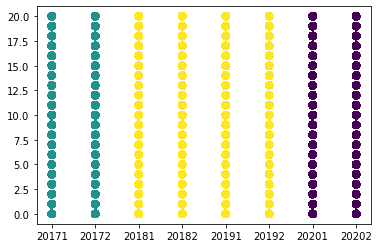

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3).fit(df2)
centroid = kmeans.cluster_centers_
plt.scatter(df2['cod_semestre'].astype(str), df2['val_calific_final'], c=kmeans.labels_.astype(float),s=50,alpha=0.5)
plt.show()
sb.set(rc={'figure.figsize':(15,10)})

In [45]:
#ALGORITMO DE CLASIFICACION
#Se trabajará con la siguiente data:

In [124]:
df3 = df
condicion=[
    (df3['Calificación']=='Sobresaliente'),
    (df3['Calificación']=='Muy Bueno'),
    (df3['Calificación']=='Bueno'),
    (df3['Calificación']=='Aprobado'),
    (df3['Calificación']=='Desaprobado')
    ]
values =[5,4,3,2,1]
df3['Estado']=np.select(condicion, values)
df3

,cod_semestre,cod_facultad,cod_escuela,cod_plan,cod_asignatura,cod_alumno,val_calific_final,Facultad,Calificación,Estado
0,20171,1,1,2004,MH0440,14010029,16.0,Medicina Humana,Bueno,3
1,20171,1,1,2004,MH0440,14010276,16.0,Medicina Humana,Bueno,3
2,20171,1,1,2004,MH0440,13010237,15.0,Medicina Humana,Bueno,3
3,20171,1,1,2004,MH0440,13010241,15.0,Medicina Humana,Bueno,3
4,20171,1,1,2004,MH0440,12010327,13.0,Medicina Humana,Aprobado,2
...,...,...,...,...,...,...,...,...,...,...
1151753,20202,20,2,2018,202W0607,18200281,15.0,Ingenieria Sistemas e informatica,Bueno,3
1151754,20202,20,2,2018,202W0607,18200315,14.0,Ingenieria Sistemas e informatica,Bueno,3
1151755,20202,20,2,2018,202W0607,18200323,16.0,Ingenieria Sistemas e informatica,Bueno,3
1151756,20202,20,2,2018,202W0607,18200320,13.0,Ingenieria Sistemas e informatica,Aprobado,2


In [125]:
df3=pd.DataFrame(df3,columns=['cod_semestre','cod_facultad','cod_escuela','Estado'])
print(df3)

facul=df3['cod_facultad']==20
mostrar=df3[facult]
mostrar

         cod_semestre  cod_facultad  cod_escuela  Estado
0               20171             1            1       3
1               20171             1            1       3
2               20171             1            1       3
3               20171             1            1       3
4               20171             1            1       2
...               ...           ...          ...     ...
1151753         20202            20            2       3
1151754         20202            20            2       3
1151755         20202            20            2       3
1151756         20202            20            2       2
1151757         20202            20            2       2

[1151758 rows x 4 columns]


,cod_semestre,cod_facultad,cod_escuela,Estado
336306,20171,20,1,2
336307,20171,20,1,2
336308,20171,20,1,3
336309,20171,20,1,2
336310,20171,20,1,2
...,...,...,...,...
1151753,20202,20,2,3
1151754,20202,20,2,3
1151755,20202,20,2,3
1151756,20202,20,2,2


In [112]:
#Importacion

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [127]:
#visualizar los tipos de datos del dataframe
mostrar.dtypes

cod_semestre    int64
cod_facultad    int64
cod_escuela     int64
Estado          int32
dtype: object

In [128]:
#Como se puede ver el codigo del plan y las asignaturas son "object", se recomeinda usar como caso de estudio la Facultad 
#de Ingenieria de Sistemas e Informatica

fisi= mostrar.loc[mostrar['cod_escuela'] == 1]
#Se procede a seleccionar los campos que serviran como variables independientes
fisi = fisi[['cod_semestre','cod_facultad','cod_escuela','Estado']]
fisi = fisi[0:148]
x=fisi.drop('Estado',axis=1)
y=fisi['Estado']

#Se selecciona el target(variable dependiente)
print(x)
print(y)

        cod_semestre  cod_facultad  cod_escuela
336306         20171            20            1
336307         20171            20            1
336308         20171            20            1
336309         20171            20            1
336310         20171            20            1
...              ...           ...          ...
336449         20171            20            1
336450         20171            20            1
336451         20171            20            1
336452         20171            20            1
336453         20171            20            1

[148 rows x 3 columns]
336306    2
336307    2
336308    3
336309    2
336310    2
         ..
336449    1
336450    2
336451    2
336452    3
336453    2
Name: Estado, Length: 148, dtype: int32


In [129]:
#fisi['cod_asignatura']=fisi['cod_asignatura'].astype(str).astype(int)
#fisi.dtypes

In [130]:
fisi.dtypes

cod_semestre    int64
cod_facultad    int64
cod_escuela     int64
Estado          int32
dtype: object

In [131]:
#a1=fisi['cod_asignatura']=='201203M '
#a=fisi[a1]
#a

In [132]:
#index= fisi[fisi['cod_asignatura']=='201203M '].index
#fisi.drop(index, inplace=True)
#print(fisi)

In [133]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [150]:
#implementacion del Algoritmo de Naives Bayes
algoritmo_clasificacion = GaussianNB()
algoritmo_clasificacion.fit(x_train,y_train)

GaussianNB()

In [137]:
print(x_test)

        cod_semestre  cod_facultad  cod_escuela
336431         20171            20            1
336357         20171            20            1
336445         20171            20            1
336325         20171            20            1
336410         20171            20            1
336318         20171            20            1
336382         20171            20            1
336337         20171            20            1
336387         20171            20            1
336315         20171            20            1
336332         20171            20            1
336402         20171            20            1
336450         20171            20            1
336373         20171            20            1
336441         20171            20            1
336372         20171            20            1
336324         20171            20            1
336375         20171            20            1
336430         20171            20            1
336336         20171            20      

In [143]:
y_pred = algoritmo_clasificacion.predict(x_test)
print(list(y_pred))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


C:\Users\ventas\anaconda3\lib\site-packages\sklearn\naive_bayes.py:452: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
C:\Users\ventas\anaconda3\lib\site-packages\sklearn\naive_bayes.py:453: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) /


In [139]:
print(y_test)

336431    1
336357    4
336445    1
336325    1
336410    1
336318    1
336382    3
336337    2
336387    1
336315    2
336332    2
336402    1
336450    2
336373    3
336441    2
336372    3
336324    4
336375    3
336430    1
336336    2
336335    2
336411    1
336342    3
336424    3
336361    3
336328    2
336370    3
336437    2
336388    1
336317    1
336442    2
336351    1
336425    3
336333    1
336310    2
336433    1
336440    2
Name: Estado, dtype: int32


In [144]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

37.83783783783784


In [145]:
print(x_train)

        cod_semestre  cod_facultad  cod_escuela
336452         20171            20            1
336348         20171            20            1
336322         20171            20            1
336316         20171            20            1
336421         20171            20            1
...              ...           ...          ...
336377         20171            20            1
336412         20171            20            1
336320         20171            20            1
336398         20171            20            1
336408         20171            20            1

[111 rows x 3 columns]


In [146]:
print(y_train)

336452    3
336348    1
336322    2
336316    1
336421    2
         ..
336377    3
336412    1
336320    2
336398    1
336408    2
Name: Estado, Length: 111, dtype: int32


In [147]:
#MATRIZ DE CONFUSION

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0,  0],
       [12,  0,  0,  0],
       [ 9,  0,  0,  0],
       [ 2,  0,  0,  0]], dtype=int64)